In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### Load Data

In [7]:
# read train data
train = pd.read_csv("train_clean.csv")
train['target'] = pd.read_csv('train.csv')['TARGET']

test = pd.read_csv("test_clean.csv")

In [8]:
# determine rows and columns
train.shape, test.shape

((76020, 308), (75818, 307))

### Missing Data

In [4]:
# a peak at null values (we know more from a script in Kaggle)
null_values = train.isnull().sum().sum()
null_values

0

In [5]:
# a peak at null values (we know more from a script in Kaggle)
null_values_test = test.isnull().sum().sum()
null_values

0

### Target variable

In [9]:
# check perentage of 0 in target variable
train.target.sum()/76020

0.0395685345961589

### Important features according to Boruta

In [13]:
# important features according to boruta
vars_to_keep = ['var38','var15','imp_op_var39_comer_ult3','imp_op_var41_comer_ult3',
                'imp_op_var41_efect_ult1','imp_op_var41_efect_ult3','imp_op_var41_ult1',
                'imp_op_var39_efect_ult1','imp_op_var39_efect_ult3','imp_op_var39_ult1',
                'ind_var37_cte','ind_var37_0', 'num_op_var41_hace2','num_op_var41_ult1',
                'num_op_var41_ult3','num_op_var39_ult1','num_op_var39_ult3','num_var37_med_ult2',
                'num_var37_0', 'saldo_var5', 'saldo_var30', 'saldo_var37', 'saldo_var42', 'num_var22_hace2',
                'num_var22_hace3', 'num_var22_ult3', 'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3',
                'num_op_var39_comer_ult1','num_op_var39_comer_ult3', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3',
                'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'saldo_medio_var5_hace2',
                'saldo_medio_var5_ult1','saldo_medio_var5_ult3', 'no0']

len(vars_to_keep)

41

### Select a smaller range of data for faster visualisation

In [11]:
# select a smaller dataset for faster processing (~20%)
train_bkup = train.copy()  # make a copy for future use
test_bkup = test.copy()

rows = np.random.choice(train.index.values, 22000) # change this number as required.
train = train.ix[rows]

rows_test = np.random.choice(test.index.values, 22000) # change this number as required.
test = test.ix[rows_test]

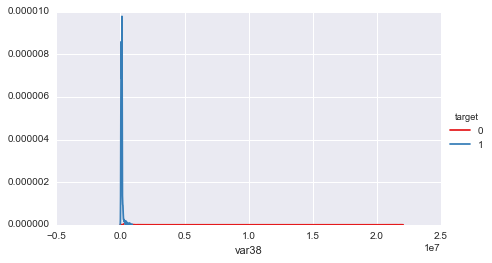

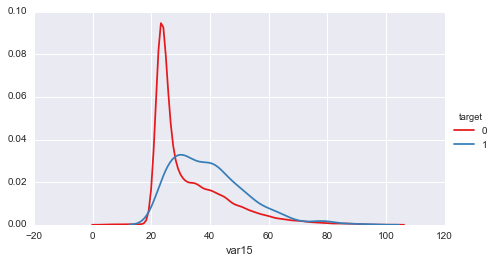

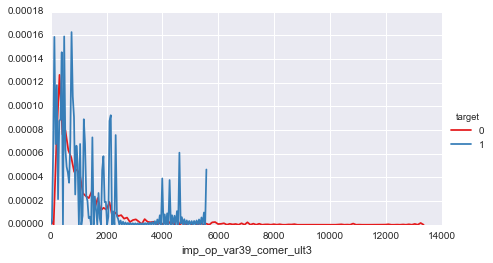

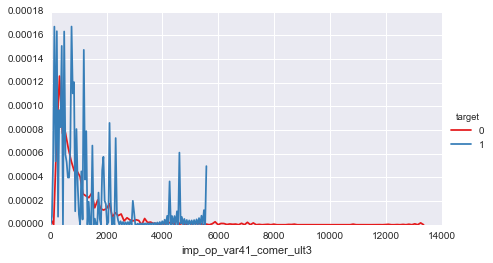

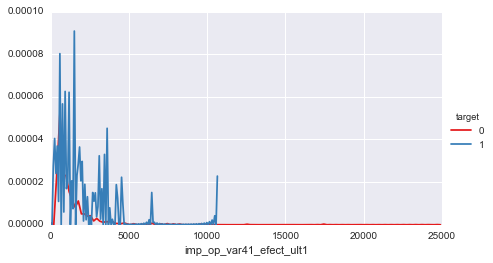

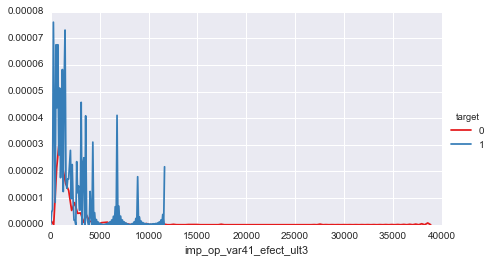

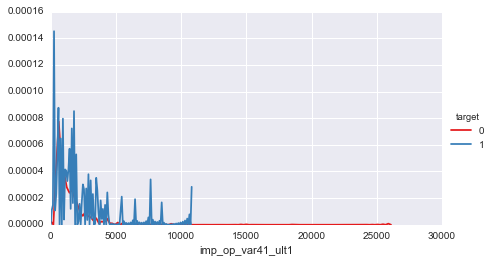

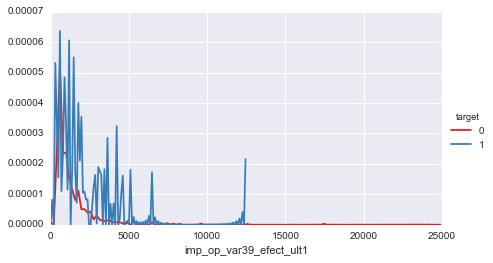

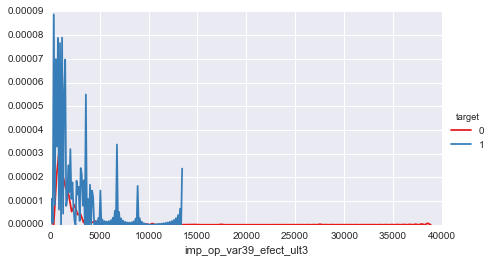

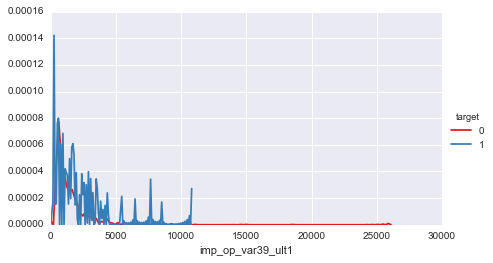

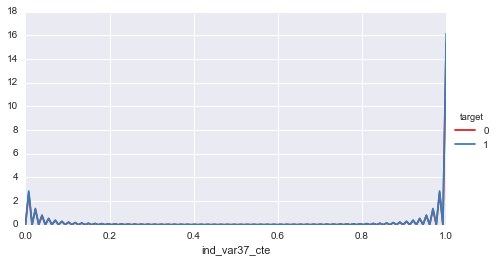

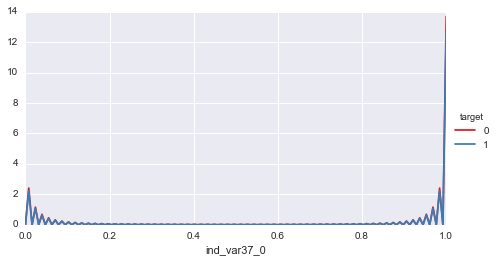

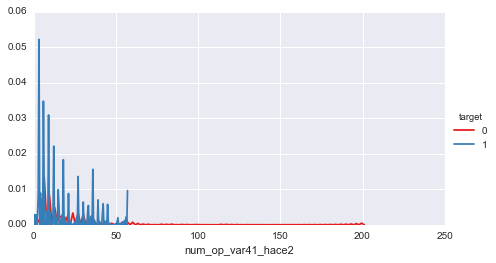

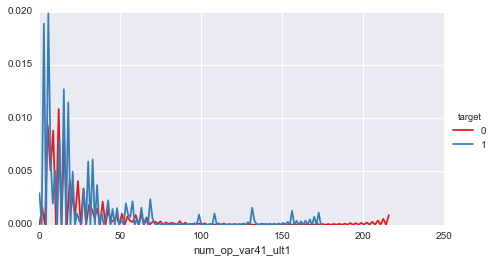

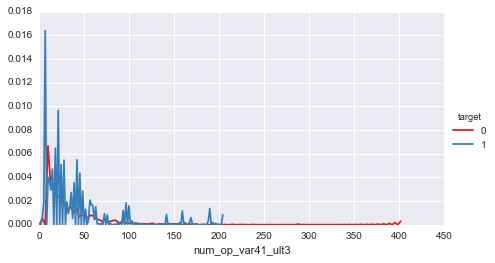

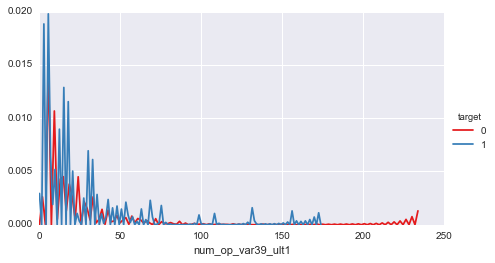

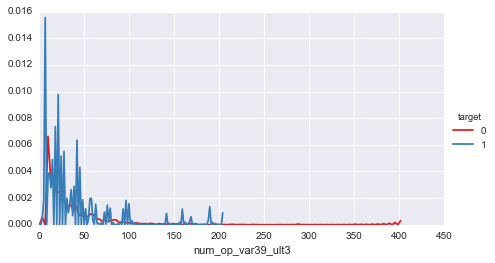

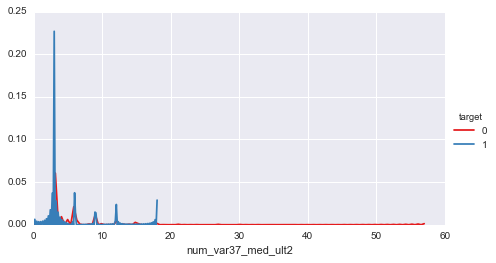

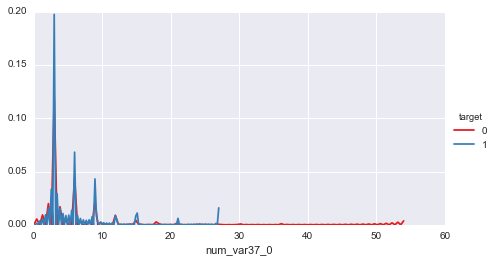

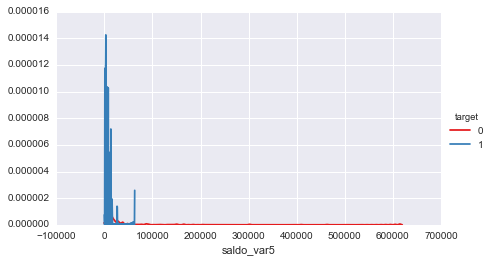

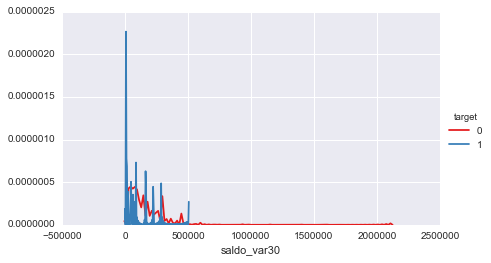

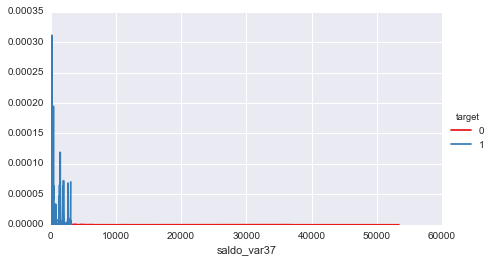

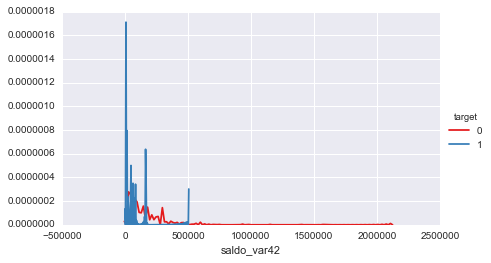

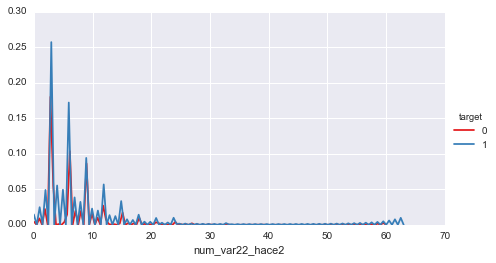

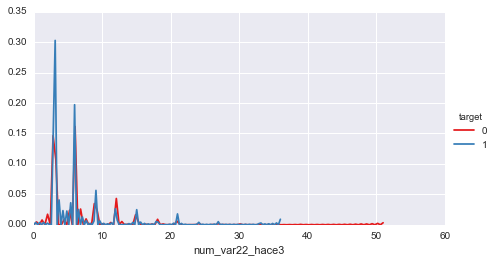

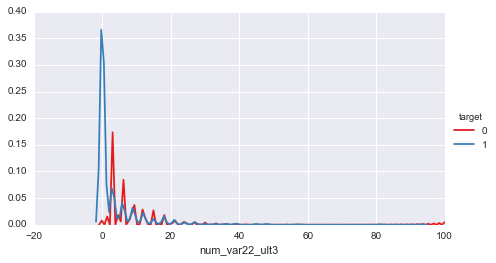

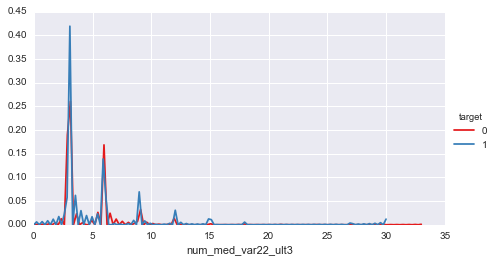

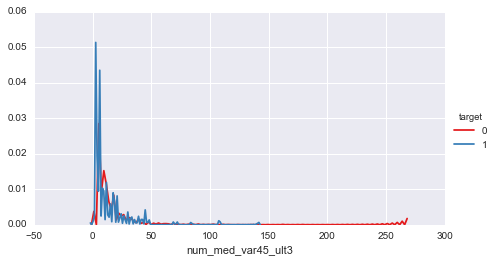

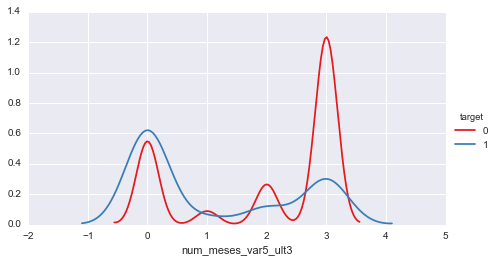

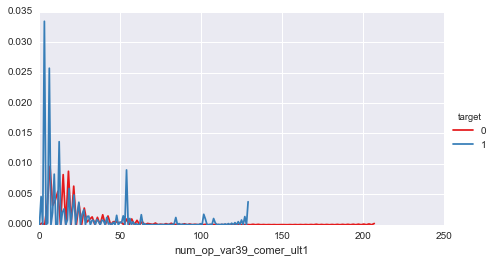

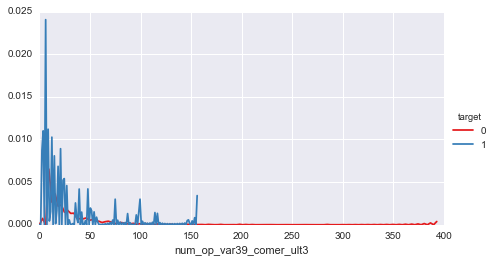

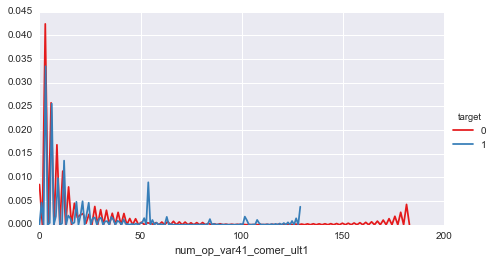

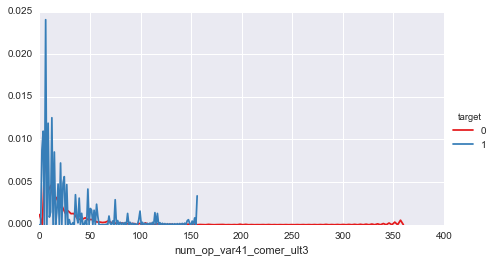

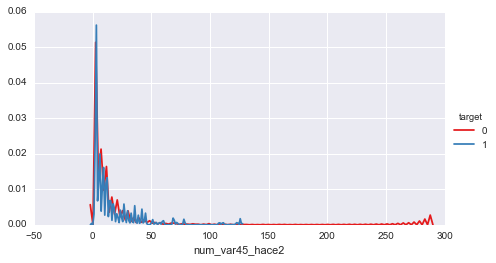

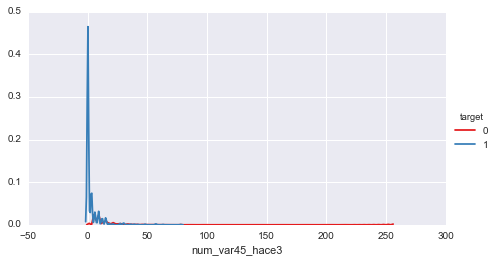

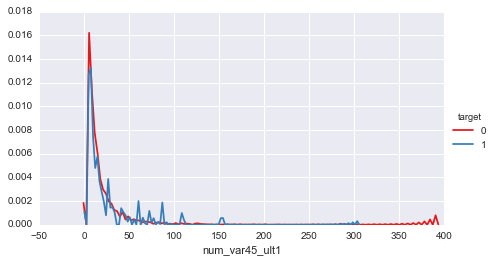

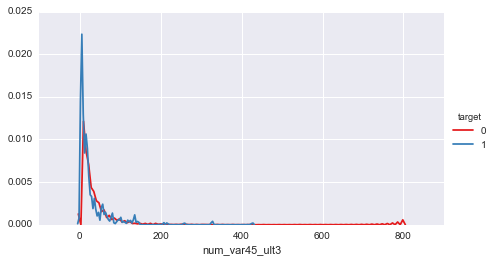

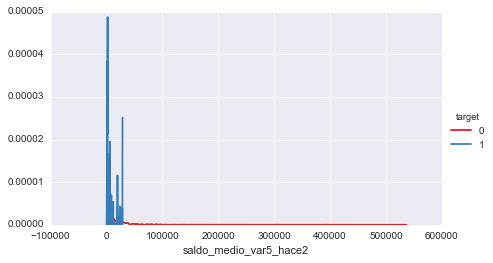

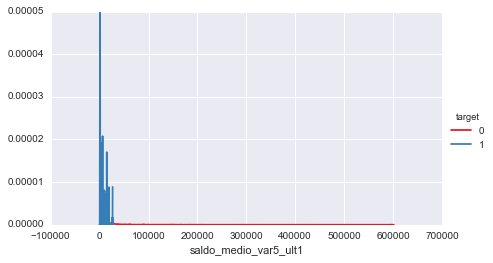

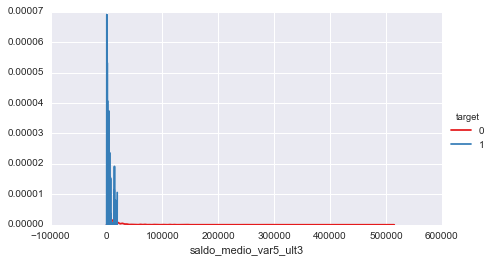

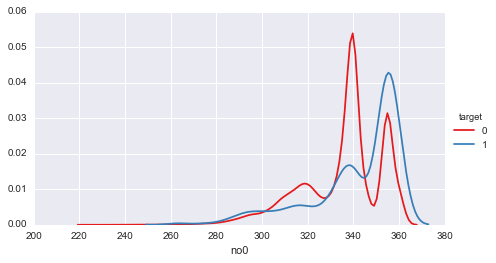

In [14]:
# plot important variables, segregate by 1, 0 of target variable

for i in vars_to_keep[0:]:
    facet = sns.FacetGrid(train, hue="target",hue_order=[0, 1], palette="Set1", aspect=2)
    facet.map(sns.kdeplot,i,shade= False)
    facet.add_legend()
    fig = plt.gcf()
    fig.set_size_inches(7, 4)

In [ ]:
# important features according to boruta
vars_to_keep = ['var38','var15','imp_op_var39_comer_ult3','imp_op_var41_comer_ult3',
                'imp_op_var41_efect_ult1','imp_op_var41_efect_ult3','imp_op_var41_ult1',
                'imp_op_var39_efect_ult1','imp_op_var39_efect_ult3','imp_op_var39_ult1',
                'ind_var37_cte','ind_var37_0', 'num_op_var41_hace2','num_op_var41_ult1',
                'num_op_var41_ult3','num_op_var39_ult1','num_op_var39_ult3','num_var37_med_ult2',
                'num_var37_0', 'saldo_var5', 'saldo_var30', 'saldo_var37', 'saldo_var42', 'num_var22_hace2',
                'num_var22_hace3', 'num_var22_ult3', 'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3',
                'num_op_var39_comer_ult1','num_op_var39_comer_ult3', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3',
                'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'saldo_medio_var5_hace2',
                'saldo_medio_var5_ult1','saldo_medio_var5_ult3', 'no0']

len(vars_to_keep)

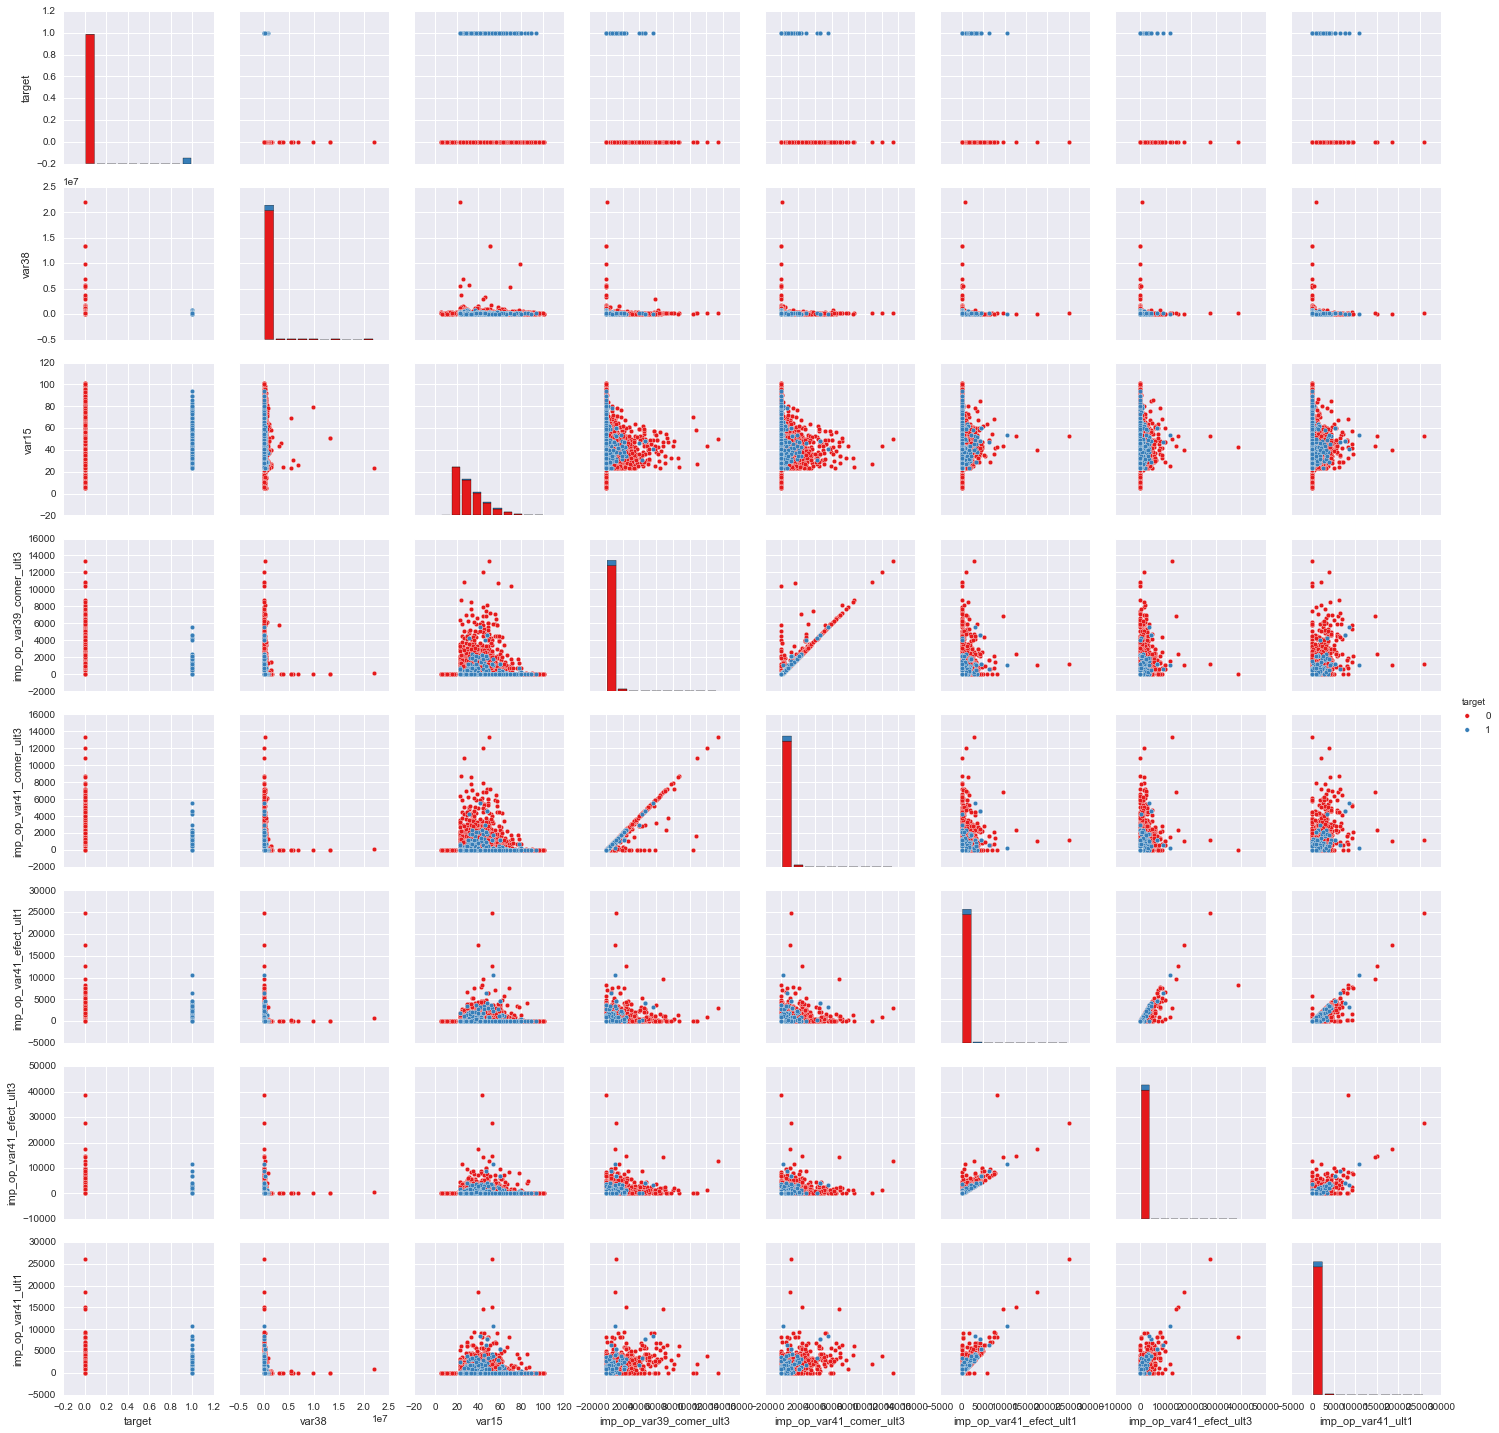

In [15]:
sns.pairplot(train[['target','var38','var15','imp_op_var39_comer_ult3','imp_op_var41_comer_ult3',
                'imp_op_var41_efect_ult1','imp_op_var41_efect_ult3','imp_op_var41_ult1']], hue = 'target',
             hue_order=[0, 1], palette="Set1")

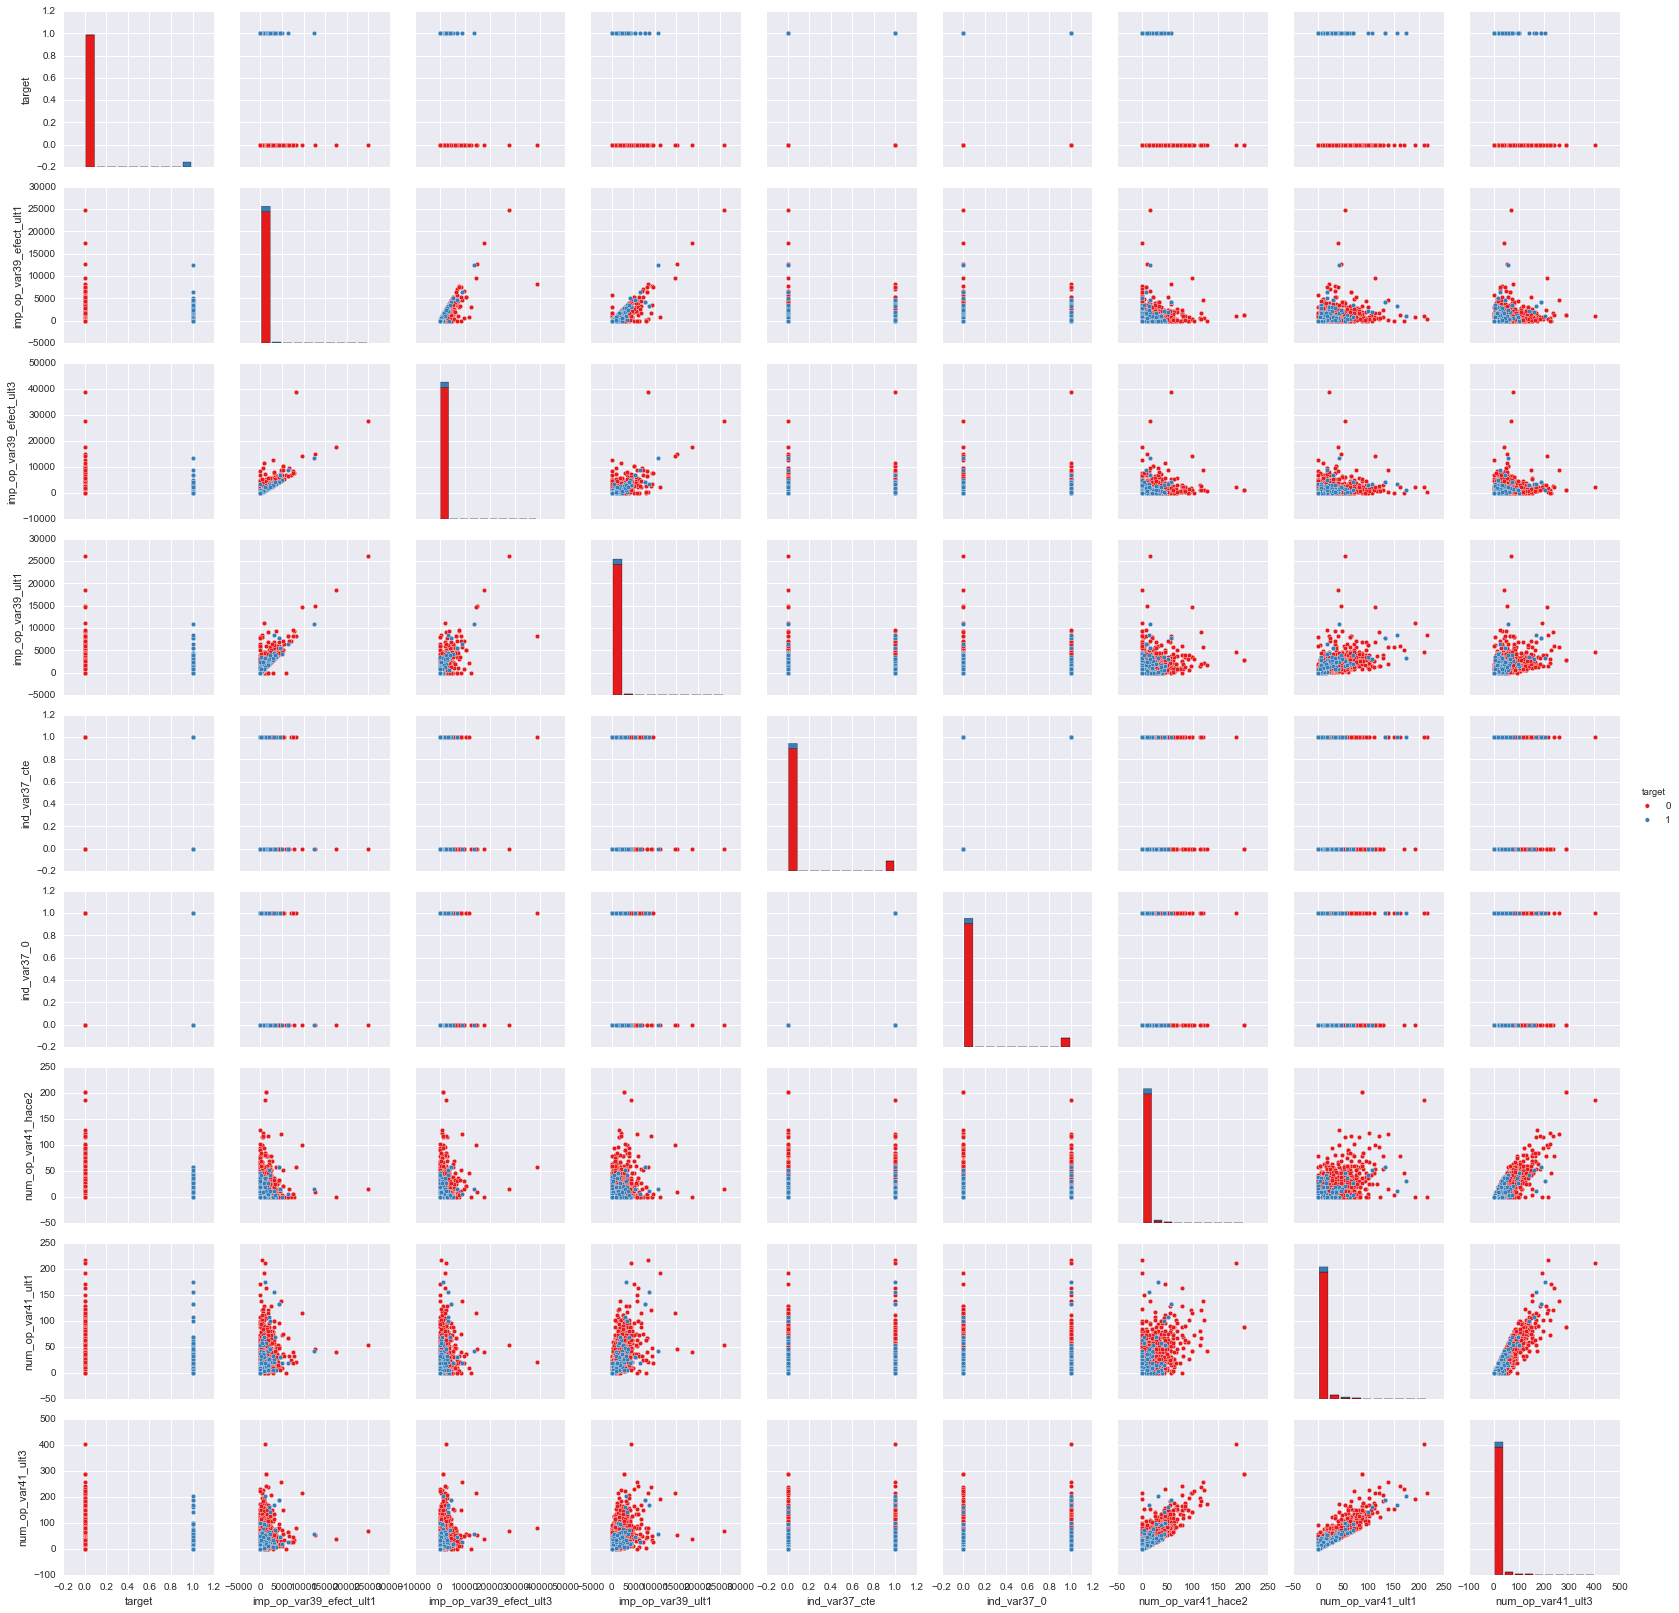

In [16]:
sns.pairplot(train[['target', 'imp_op_var39_efect_ult1','imp_op_var39_efect_ult3','imp_op_var39_ult1',
                'ind_var37_cte','ind_var37_0', 'num_op_var41_hace2','num_op_var41_ult1',
                'num_op_var41_ult3']], hue = 'target',
             hue_order=[0, 1], palette="Set1")

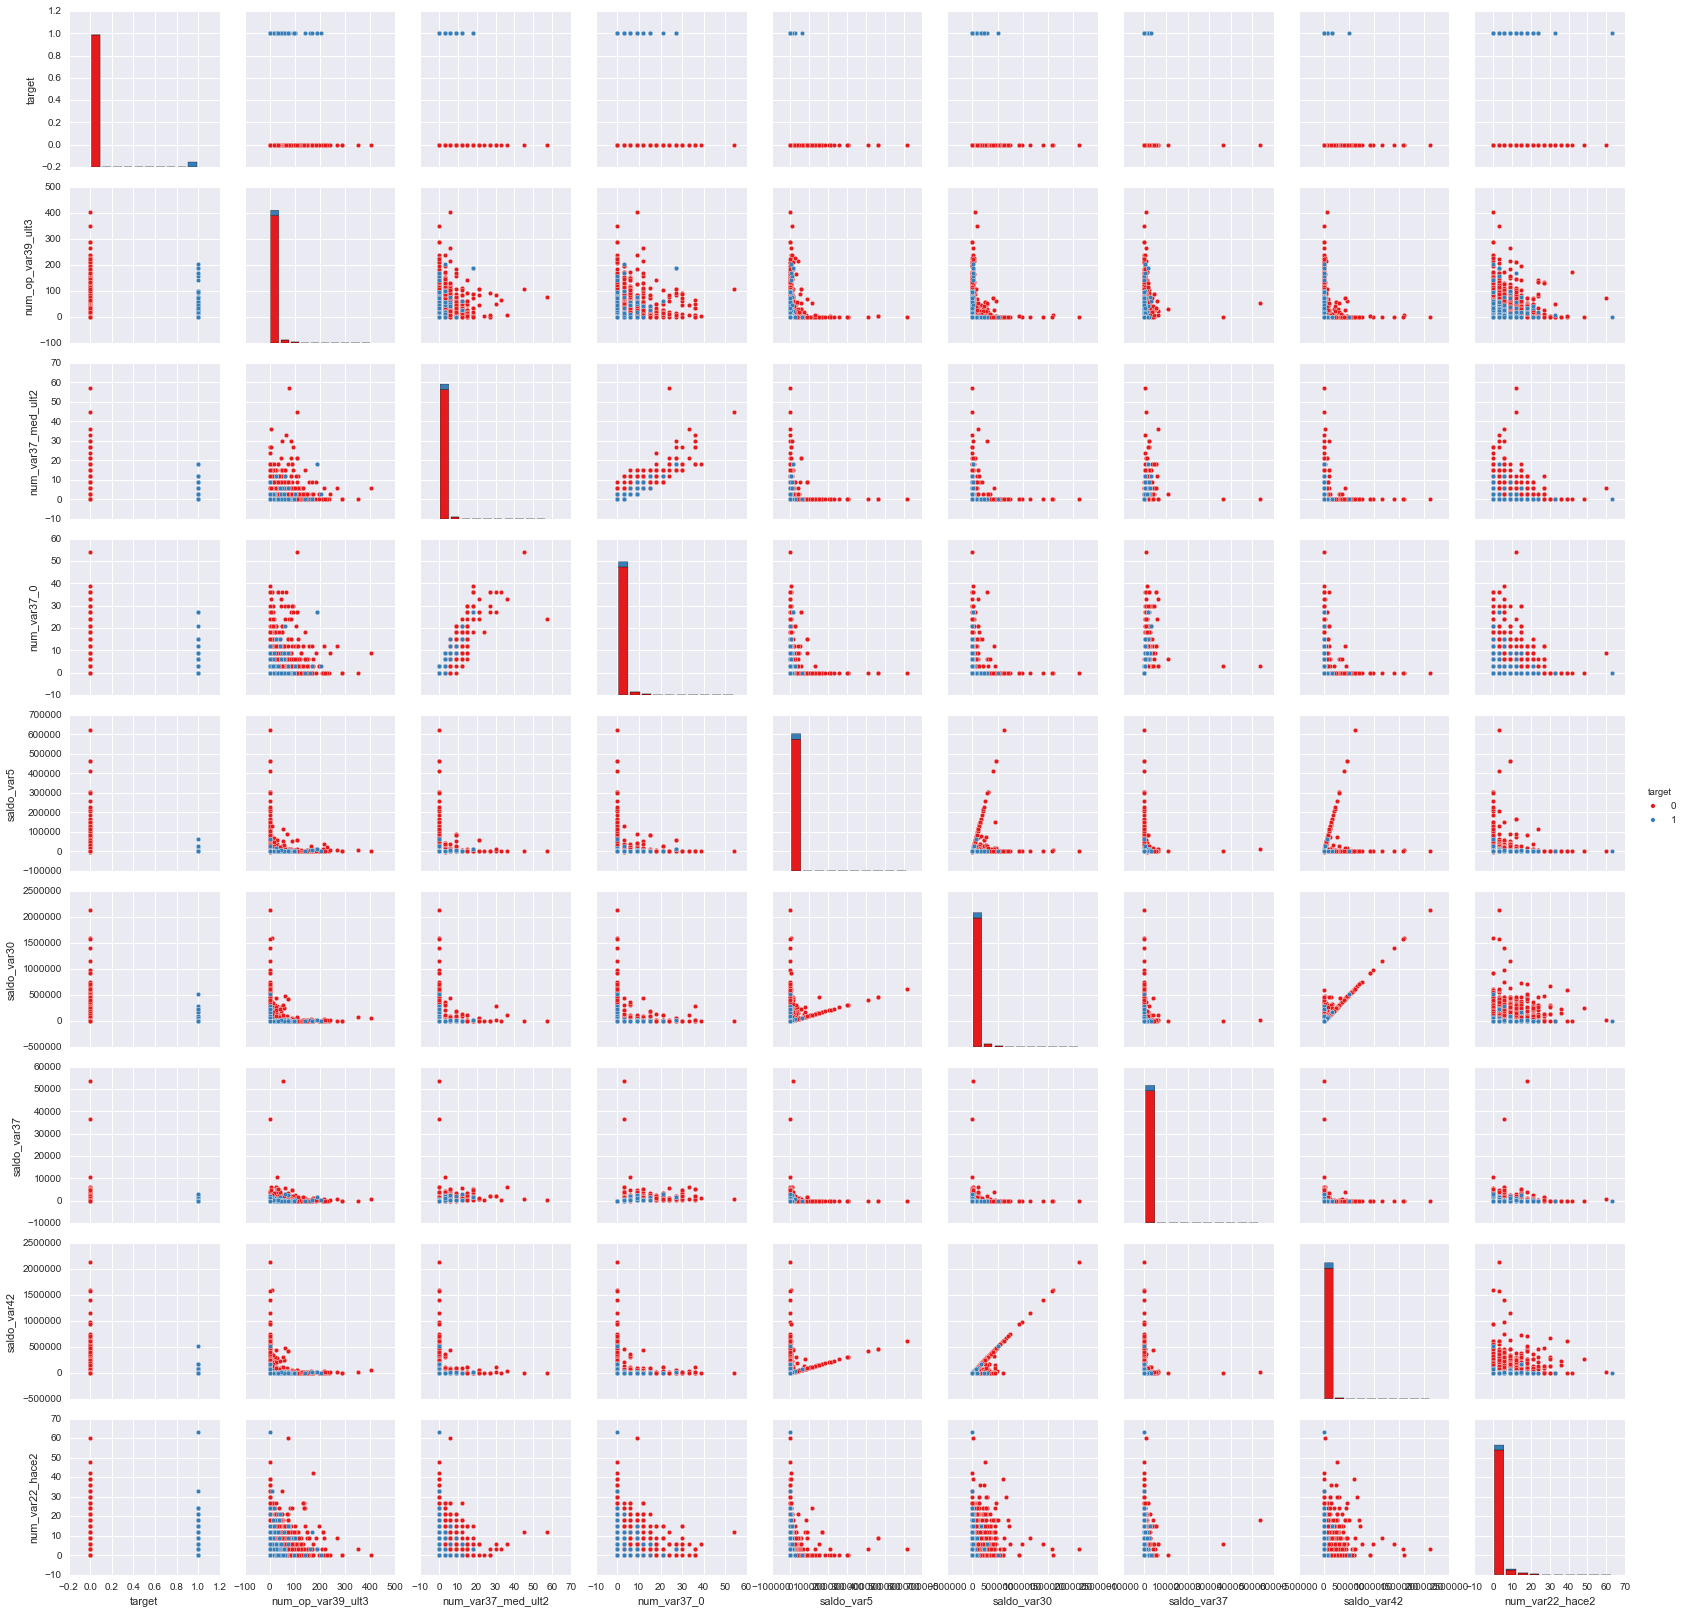

In [17]:
sns.pairplot(train[['target', 'num_op_var39_ult3','num_var37_med_ult2',
                'num_var37_0', 'saldo_var5', 'saldo_var30', 'saldo_var37', 'saldo_var42', 'num_var22_hace2']], hue = 'target',
             hue_order=[0, 1], palette="Set1")

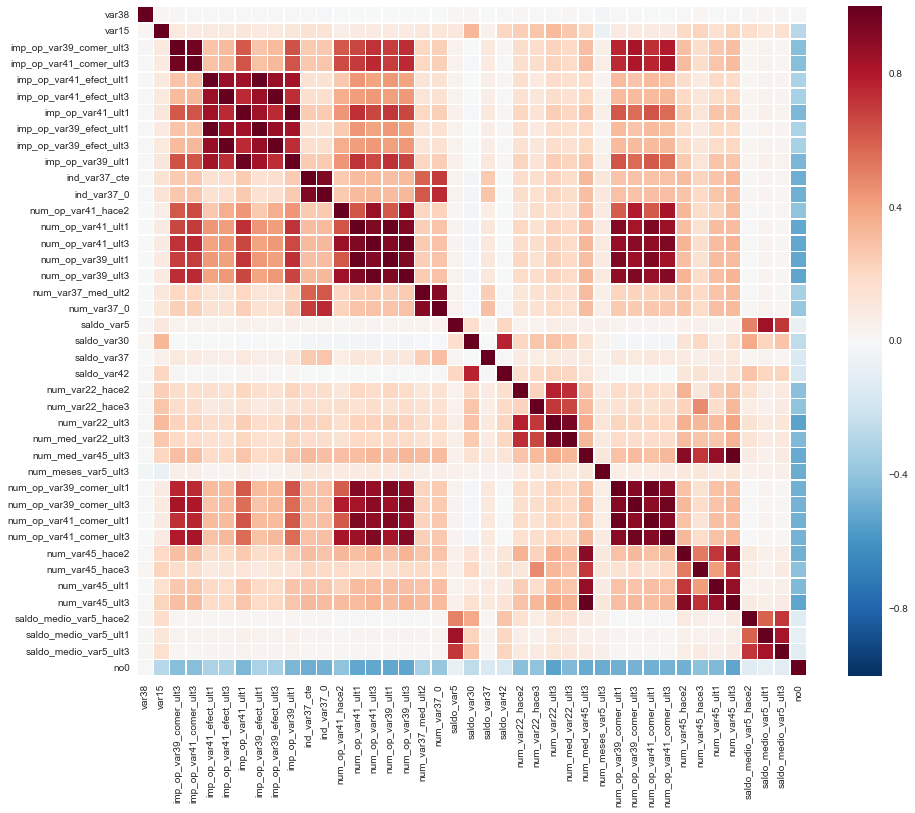

In [19]:
cor_mat = train[vars_to_keep].corr()

f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax)

In [44]:
# only important correlations and not auto-correlations
threshold = 0.7
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

# sort by attribute to visualise multiple correlations
unique_important_corrs.sort_values(by='attribute pair', axis=0, ascending=True, inplace=False,
                                   kind='quicksort', na_position='last')[0:10]


,attribute pair,correlation
53,"(imp_op_var39_comer_ult3, imp_op_var41_comer_u...",0.961569
82,"(imp_op_var39_comer_ult3, num_op_var39_comer_u...",0.758687
7,"(imp_op_var39_comer_ult3, num_op_var39_comer_u...",0.823441
48,"(imp_op_var39_comer_ult3, num_op_var39_ult3)",0.740673
30,"(imp_op_var39_comer_ult3, num_op_var41_comer_u...",0.727553
44,"(imp_op_var39_comer_ult3, num_op_var41_comer_u...",0.790671
20,"(imp_op_var39_comer_ult3, num_op_var41_ult3)",0.720393
15,"(imp_op_var39_efect_ult1, imp_op_var39_efect_u...",0.867444
23,"(imp_op_var39_efect_ult1, imp_op_var39_ult1)",0.837276
79,"(imp_op_var39_efect_ult1, imp_op_var41_efect_u...",0.998840
